In [1]:
import pandas as pd

In [2]:
df_movies = pd.read_csv("data/IMDb movies.csv", index_col='imdb_title_id')

In [3]:
df_movies.head(3)

,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537,$ 2250,NaN,NaN,NaN,7.0,7.0
tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171,NaN,NaN,NaN,NaN,4.0,2.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420,$ 45000,NaN,NaN,NaN,24.0,3.0


In [4]:
df_movies.columns

Index(['title', 'original_title', 'year', 'date_published', 'genre',
       'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81273 entries, tt0000574 to tt9914286
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  81273 non-null  object 
 1   original_title         81273 non-null  object 
 2   year                   81273 non-null  int64  
 3   date_published         81273 non-null  object 
 4   genre                  81273 non-null  object 
 5   duration               81273 non-null  int64  
 6   country                81234 non-null  object 
 7   language               80518 non-null  object 
 8   director               81200 non-null  object 
 9   writer                 79780 non-null  object 
 10  production_company     76948 non-null  object 
 11  actors                 81207 non-null  object 
 12  description            78843 non-null  object 
 13  avg_vote               81273 non-null  float64
 14  votes                  81273 non-null  int64  


In [6]:
df_movies_one = df_movies.copy()

In [7]:
gn = df_movies_one[['genre','reviews_from_users']]
gns = list(set(gn['genre']))
gnm= {}
for i in range (0, len(gns)):
    gnr = gn[gn['genre']==gns[i]]
    gnm[gns[i]]=list(gnr.mean())[0]


    
    



In [8]:
gnm

{'Film-Noir, Thriller': 83.28571428571429,
 'Mystery, Action, Thriller': 14.0,
 'Horror, Music': 25.428571428571427,
 'Drama, Mystery, Crime': 18.0,
 'Crime, Thriller, Western': 21.5,
 'Mystery, News, Thriller': 12.0,
 'History, Romance': 6.0,
 'Crime, Horror, Action': 27.5,
 'Family, History': 1.0,
 'Horror, Western, Thriller': 26.0,
 'Action, Adventure, Fantasy': 350.9194915254237,
 'Crime, Horror, Mystery': 42.0625,
 'Drama, Fantasy, Family': 50.0,
 'Action, Comedy, Music': 24.555555555555557,
 'Animation, Comedy, Romance': 4.5,
 'Adventure, Biography, Romance': 17.333333333333332,
 'Drama, Family, Musical': 38.758620689655174,
 'Adventure, Crime, Sport': 9.0,
 'Biography, Drama, Western': 78.42857142857143,
 'Drama, History, Western': 17.727272727272727,
 'Mystery, Drama, Fantasy': 61.0,
 'Drama, Mystery, Action': 7.0,
 'Action, Animation, Comedy': 9.5,
 'Comedy, Family, Music': 70.4,
 'Crime, Mystery, Horror': 33.0,
 'Animation, Adventure, Crime': 13.625,
 'Drama, Comedy, Mystery'

### 1. Find the mean from  review_from_users for each unique genre 
e.g action,drama=7.2 thriller=9.7
### 2. We replace each null value with its corresponding mean

In [10]:
df_movies_one.drop_duplicates(inplace=True, keep='first')

In [11]:
df_nulls = df_movies_one.isnull()

In [12]:
df_nulls.sum()

title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     39
language                   755
director                    73
writer                    1493
production_company        4325
actors                      66
description               2430
avg_vote                     0
votes                        0
budget                   58469
usa_gross_income         66179
worlwide_gross_income    51381
metascore                68551
reviews_from_users        7077
reviews_from_critics     10987
dtype: int64

In [ ]:
df_movies_one.shape

In [29]:
m=list (df_movies_one['country'].mode())

In [30]:
mm = m[0]

In [17]:
n = list(df_movies_one['language'].mode())

In [19]:
nn = n[0]

In [21]:
p = list(df_movies_one['director'].mode())

In [22]:
pp = p[0]

In [24]:
q = list(df_movies_one['writer'].mode())

In [25]:
qq = q[0]

In [38]:
r = list(df_movies_one['production_company'].mode())

In [39]:
rr = r[0]

In [41]:
s = list(df_movies_one['description'].mode())

In [42]:
ss = s[0]

In [71]:
t = list(df_movies_one['actors'].mode())

In [72]:
tt = s[0]

In [67]:
df_movies_one['metascore'].mean()

55.76269454488288

In [80]:
df_movies_one['reviews_from_users'].mean()

43.75319424227721

In [81]:
df_movies_one['reviews_from_critics'].mean()

27.992758159519678

In [31]:
df_movies_one['country'].fillna(mm,inplace=True)

In [20]:
df_movies_one['language'].fillna(nn,inplace=True)

In [23]:
df_movies_one['director'].fillna(pp,inplace=True)

In [26]:
df_movies_one['writer'].fillna(qq,inplace=True)

In [40]:
df_movies_one['production_company'].fillna(rr,inplace=True)

In [77]:
df_movies_one['actors'].fillna(tt,inplace=True)

In [43]:
df_movies_one['description'].fillna(ss,inplace=True)

In [35]:
df_movies_one['budget'].fillna(0,inplace=True)

In [59]:
df_movies_one['usa_gross_income'].fillna(0,inplace=True)

In [64]:
df_movies_one['worlwide_gross_income'].fillna(0,inplace=True)

In [68]:
df_movies_one['metascore'].fillna(df_movies_one['metascore'].mean(),inplace=True)

In [82]:
df_movies_one['reviews_from_users'].fillna(df_movies_one['reviews_from_users'].mean(),inplace=True)

In [83]:
df_movies_one['reviews_from_critics'].fillna(df_movies_one['reviews_from_critics'].mean(),inplace=True)

In [84]:
df_nulls2 = df_movies_one.isnull()

In [85]:
df_nulls2.sum()

title                    0
original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                  0
language                 0
director                 0
writer                   0
production_company       0
actors                   0
description              0
avg_vote                 0
votes                    0
budget                   0
usa_gross_income         0
worlwide_gross_income    0
metascore                0
reviews_from_users       0
reviews_from_critics     0
dtype: int64

In [87]:
df_movies_one['genre']

imdb_title_id
tt0000574      Biography, Crime, Drama
tt0001892                        Drama
tt0002101               Drama, History
tt0002130    Adventure, Drama, Fantasy
tt0002199             Biography, Drama
                       ...            
tt9903716             Horror, Thriller
tt9905412                        Drama
tt9905462                        Drama
tt9911774                        Drama
tt9914286                Drama, Family
Name: genre, Length: 81273, dtype: object

In [122]:
gp = list(set(df_movies_one['genre']))
gp

new_gp = gp.





['Film-Noir, Thriller',
 'Mystery, Action, Thriller',
 'Horror, Music',
 'Drama, Mystery, Crime',
 'Crime, Thriller, Western',
 'Mystery, News, Thriller',
 'History, Romance',
 'Crime, Horror, Action',
 'Family, History',
 'Horror, Western, Thriller',
 'Action, Adventure, Fantasy',
 'Crime, Horror, Mystery',
 'Drama, Fantasy, Family',
 'Action, Comedy, Music',
 'Animation, Comedy, Romance',
 'Adventure, Biography, Romance',
 'Drama, Family, Musical',
 'Adventure, Crime, Sport',
 'Biography, Drama, Western',
 'Drama, History, Western',
 'Mystery, Drama, Fantasy',
 'Drama, Mystery, Action',
 'Action, Animation, Comedy',
 'Comedy, Family, Music',
 'Crime, Mystery, Horror',
 'Animation, Adventure, Crime',
 'Drama, Comedy, Mystery',
 'Animation, Action, Crime',
 'Musical, Drama, Crime',
 'Drama, Music, Romance',
 'Family, Animation, Comedy',
 'Music, Musical, Sci-Fi',
 'Crime, Film-Noir, Thriller',
 'Animation, Action, Sci-Fi',
 'Family, Music, Romance',
 'Action, Biography, History',
 'Thr

ValueError: could not convert string to float: 'gp'

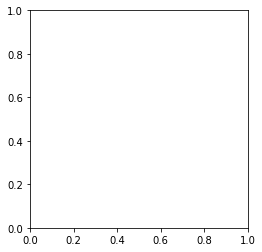

In [119]:
import matplotlib.pyplot as plt

plt.pie('gp',labels='genre')





In [123]:
gn = df_movies_one[['genre','reviews_from_users']]
gns = list(set(gn['genre']))
gnm= {}
for i in range (0, len(gns)):
    gnr = gn[gn['genre']==gns[i]]
    gnm[gns[i]]=list(gnr.mean())[0]

In [124]:
gnm

{'Film-Noir, Thriller': 83.28571428571429,
 'Mystery, Action, Thriller': 14.0,
 'Horror, Music': 25.428571428571427,
 'Drama, Mystery, Crime': 18.0,
 'Crime, Thriller, Western': 21.5,
 'Mystery, News, Thriller': 12.0,
 'History, Romance': 6.0,
 'Crime, Horror, Action': 27.5,
 'Family, History': 1.0,
 'Horror, Western, Thriller': 26.0,
 'Action, Adventure, Fantasy': 348.33826213648973,
 'Crime, Horror, Mystery': 42.083372768423175,
 'Drama, Fantasy, Family': 50.0,
 'Action, Comedy, Music': 24.555555555555557,
 'Animation, Comedy, Romance': 12.350638848455443,
 'Adventure, Biography, Romance': 17.333333333333332,
 'Drama, Family, Musical': 39.22686196021349,
 'Adventure, Crime, Sport': 9.0,
 'Biography, Drama, Western': 78.42857142857143,
 'Drama, History, Western': 19.896099520189768,
 'Mystery, Drama, Fantasy': 61.0,
 'Drama, Mystery, Action': 7.0,
 'Action, Animation, Comedy': 9.5,
 'Comedy, Family, Music': 65.9588657070462,
 'Crime, Mystery, Horror': 33.0,
 'Animation, Adventure, Cri

ValueError: could not convert string to float: 'Film-Noir, Thriller'

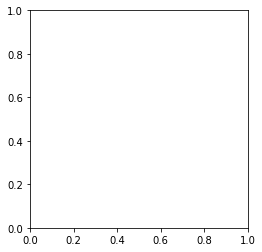

In [126]:
labels = ['gn']
sizes = [gns]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()